<h1 style='color:purple' align='center'>Convolutional Neural Network in Keras for image classification</h1>

**We will use keras fashion MNIST dataset. This consist of 60000, 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories**



we are using TensorFlow as our backend and applying activation functions like Relu,Softmax on model.
**Each image is 28 x 28 pixel in dimension**

**The 10 Categories are:**

**1.T-shirt/top**

**2.Trouser**

**3.Pullover**

**4.Dress**

**5.Coat**

**6.Sandal**

**7.Shirt**

**8.Sneaker**

**9.Bag**

**10.Ankle boot**

Import keras,numpy,matplotlib by using "**import**" and we can make shortcuts to use further in notebook by "**as**" .

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#using tensorflow as backend.
keras.backend.backend()

'tensorflow'

**fashion_mnist Dataset is loaded from keras and assigned to x_train,x_test,y_train,y_test**  

In [3]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
#As mentioned earlier trainset is having 60000 of pixels 28x28 images
X_train.shape

(60000, 28, 28)

In [5]:
#testset is having 10000 of pixels 28x28 images
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

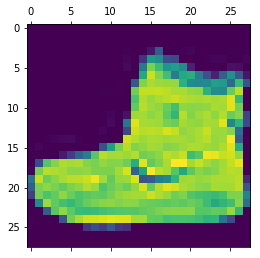

In [8]:
plt.matshow(X_train[0])

<h3 style='color:purple'>Normalize training data before training the neural net</h3>


Diving each pixel value by **255** is standard which reduces each pixel values.

In [0]:
X_train = X_train/255

In [0]:
X_test = X_test/255

<h3 style='color:purple'>Now build the Sequential Model and add layers into it</h3>

By adding activation functions like Relu and Softmax.

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

<img src='fashion_neural_net.png' />

In [12]:
#it gives the summary of the sequential model and layers added to it
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
#here we are using optimizer as **adam** and metrics for finding the accuracy of the model
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [14]:
#model is fitted here both X_train and y_train
model.fit(X_train, y_train)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
60000/60000 [==============================] - 6s 107us/step - loss: 0.5102 - acc: 0.8224


In [15]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 31us/step


[0.43337395389080047, 0.8463]

**Above shows accuracy score of 84.63%. The first parameter is loss**

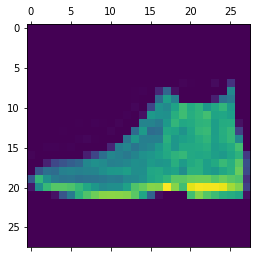

In [16]:
plt.matshow(X_test[0])

In [0]:
yp = model.predict(X_test)

In [18]:
np.argmax(yp[0])

5

In [0]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [20]:
#model prediction for given image
class_labels[np.argmax(yp[0])]

'Sandal'